In [44]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [4]:
df = pd.read_csv('../data/201808-citibike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977177 entries, 0 to 1977176
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           float64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
dtypes: float64(6), int64(4), object(5)
memory usage: 226.3+ MB


In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


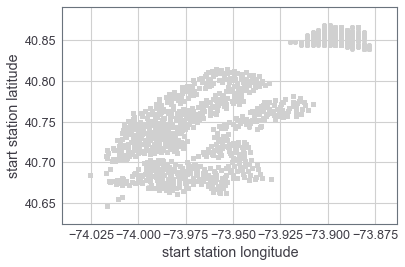

In [10]:
df.plot.scatter('start station longitude', 'start station latitude')

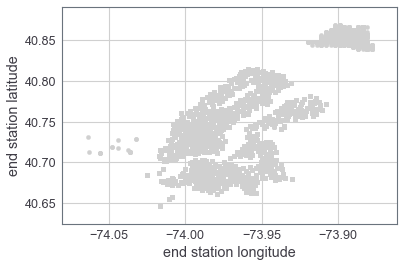

In [11]:
df.plot.scatter('end station longitude', 'end station latitude')

In [12]:
np.max(df['start station longitude']), np.min(df['start station longitude'])

(-73.878, -74.02535319328308)

In [13]:
np.max(df['start station latitude']), np.min(df['start station latitude'])

(40.869, 40.646538367096475)

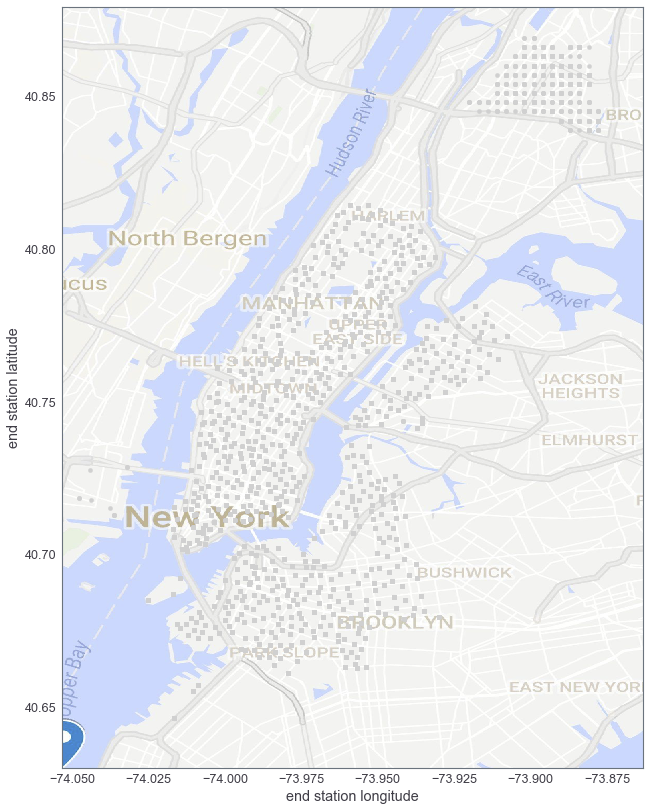

In [26]:
plt.figure(figsize=(10.4, 18))
img = plt.imread('../data/NYC_map.png')
plt.imshow(img, zorder=0, extent=[-74.05322, -73.86328, 40.63001, 40.87928])
ax = plt.gca()
df.plot('end station longitude', 'end station latitude', kind='scatter', ax=ax)
plt.grid(False)
plt.xlim([-74.05322, -73.86328])
plt.ylim([40.63001, 40.87928])
plt.show()

In [33]:
pd.DatetimeIndex(df['starttime']).hour

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='starttime', length=1977177)

In [34]:
pd.DatetimeIndex(df['starttime']).day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='starttime', length=1977177)

In [39]:
df[['usertype', 'tripduration']].groupby(['usertype'], as_index=False).mean()

,usertype,tripduration
0,Customer,2192.920247
1,Subscriber,822.244561


In [40]:
df[['gender', 'tripduration']].groupby(['gender'], as_index=False).count()

,tripduration
gender,
0,205380
1,1296312
2,475485


In [53]:
df[['birth year', 'tripduration']].groupby(['birth year'], as_index=False).\
    count().sort_values(by='tripduration', ascending=False)

,birth year,tripduration
71,1969,221519
90,1988,86468
92,1990,83306
91,1989,83091
93,1991,77753
89,1987,76279
94,1992,72997
88,1986,71648
87,1985,70449
95,1993,68141


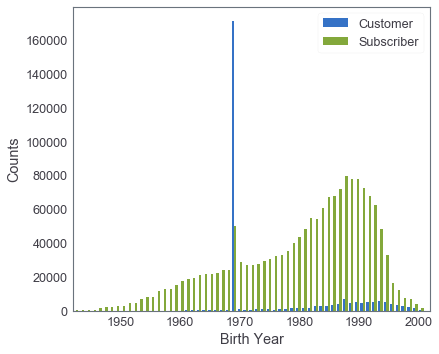

In [165]:
age_customer = df[(df['birth year'] >= 1942) & (df['birth year'] < 2002) 
                  & (df['usertype']=='Customer')]['birth year'].values
age_subscriber = df[(df['birth year'] >= 1942) & (df['birth year'] < 2002) 
                  & (df['usertype']=='Subscriber')]['birth year'].values
plt.hist([age_customer, age_subscriber], bins=60, label=['Customer', 'Subscriber'])
plt.grid(False)
plt.xlim([1942,2002])
plt.xlabel('Birth Year')
plt.ylabel('Counts')
plt.legend()
plt.savefig('../plot/dis_birthYear.pdf', bbox_inches='tight')

In [58]:
df['start_day'] = pd.DatetimeIndex(df['starttime']).day
df['end_day'] = pd.DatetimeIndex(df['stoptime']).day
df['start_hour'] = pd.DatetimeIndex(df['starttime']).hour
df['end_hour'] = pd.DatetimeIndex(df['stoptime']).hour
df['day_of_week'] = pd.DatetimeIndex(df['starttime']).dayofweek
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_day,end_day,start_hour,end_hour,day_of_week
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,1,1,0,0,2
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,1,1,0,0,2
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,1,1,0,0,2
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,1,1,0,0,2
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,1,1,0,0,2


In [88]:
X_days = range(1,32)
cnt_customer = df[df['usertype']=='Customer'][['start_day','tripduration']].\
    groupby(['start_day']).count()['tripduration'].values
cnt_subscriber = df[df['usertype']=='Subscriber'][['start_day','tripduration']].\
    groupby(['start_day']).count()['tripduration'].values

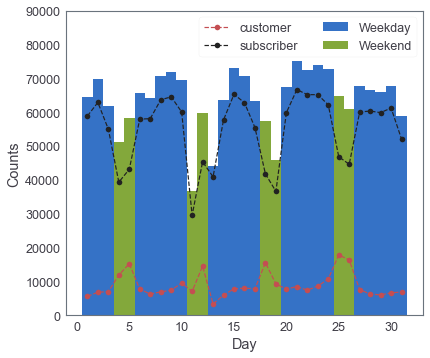

In [105]:
plt.hist(df[df['day_of_week']<=4]['start_day'], bins=np.linspace(0.5,31.5,32), label='Weekday')
plt.hist(df[df['day_of_week']> 4]['start_day'], bins=np.linspace(0.5, 31.5,32), label='Weekend')
plt.plot(X_days, cnt_customer, 'ro--', label='customer')
plt.plot(X_days, cnt_subscriber, 'ko--', label='subscriber')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.grid(False)
plt.ylim([0,90000])
plt.legend(ncol=2)
plt.savefig('../plot/day_dependence.pdf', bbox_inches='tight')

In [106]:
X_days = range(0,7)
cnt_customer = df[df['usertype']=='Customer'][['day_of_week','tripduration']].\
    groupby(['day_of_week']).count()['tripduration'].values
cnt_subscriber = df[df['usertype']=='Subscriber'][['day_of_week','tripduration']].\
    groupby(['day_of_week']).count()['tripduration'].values

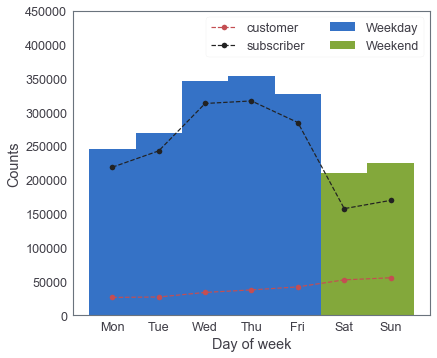

In [128]:
plt.hist(df[df['day_of_week']<=4]['day_of_week'], bins=np.linspace(-0.5,6.5,8), label='Weekday')
plt.hist(df[df['day_of_week']> 4]['day_of_week'], bins=np.linspace(-0.5,6.5,8), label='Weekend')
plt.plot(X_days, cnt_customer, 'ro--', label='customer')
plt.plot(X_days, cnt_subscriber, 'ko--', label='subscriber')
plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of week')
plt.ylabel('Counts')
plt.grid(False)
plt.ylim([0,450000])
plt.legend(ncol=2)
plt.savefig('../plot/dayofweek_dependence.pdf', bbox_inches='tight')

In [150]:
trips = []
for day in range(0,7):
    trips.append(df[df['day_of_week']==day]['tripduration'].values/60)
customer = df[df['usertype']=='Customer'][['day_of_week','tripduration']].\
    groupby(['day_of_week']).median()['tripduration'].values/60
subscriber = df[df['usertype']=='Subscriber'][['day_of_week','tripduration']].\
    groupby(['day_of_week']).median()['tripduration'].values/60

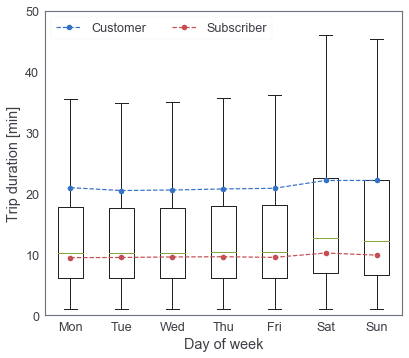

In [151]:
plt.boxplot(trips)
plt.plot(range(1,8), customer, 'bo--', label='Customer')
plt.plot(range(1,8), subscriber, 'ro--', label='Subscriber')
plt.grid(False)
plt.xlabel('Day of week')
plt.ylabel('Trip duration [min]')
plt.xticks(range(1,8),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim([0,50])
plt.legend(ncol=2, loc=2)
plt.savefig('../plot/trip_dayofweek.pdf', bbox_inches='tight')

In [156]:
df['age'] = 2018 - df['birth year']
ages = []
for day in range(0,7):
    ages.append(df[(df['day_of_week']==day) & (df['age']!=2018-1969)]['age'].values)
customer = df[(df['usertype']=='Customer') & (df['age']!=2018-1969)][['day_of_week','age']].\
    groupby(['day_of_week']).median()['age'].values
subscriber = df[(df['usertype']=='Subscriber') & (df['age']!=2018-1969)][['day_of_week','age']].\
    groupby(['day_of_week']).median()['age'].values

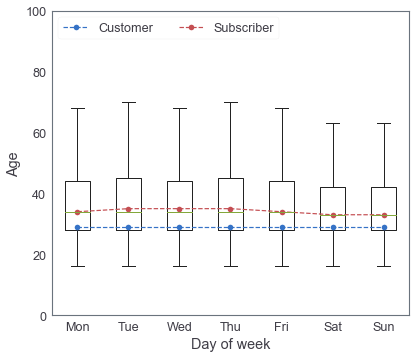

In [157]:
plt.boxplot(ages)
plt.plot(range(1,8), customer, 'bo--', label='Customer')
plt.plot(range(1,8), subscriber, 'ro--', label='Subscriber')
plt.grid(False)
plt.xlabel('Day of week')
plt.ylabel('Age')
plt.xticks(range(1,8),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim([0,100])
plt.legend(ncol=2, loc=2)
plt.savefig('../plot/age_dayofweek.pdf', bbox_inches='tight')

In [177]:
cnts = []
for usertype in ('Customer', 'Subscriber'):
    for gender in (1, 2):
        cnts.append(df[(df['usertype']==usertype) & (df['gender']==gender)][['day_of_week','tripduration']]
                   .groupby(['day_of_week']).count()['tripduration'].values)

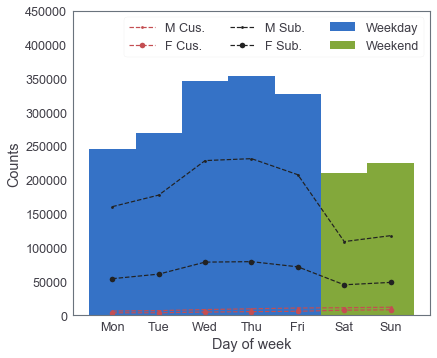

In [182]:
plt.hist(df[df['day_of_week']<=4]['day_of_week'], bins=np.linspace(-0.5,6.5,8), label='Weekday')
plt.hist(df[df['day_of_week']> 4]['day_of_week'], bins=np.linspace(-0.5,6.5,8), label='Weekend')
labels = ['M Cus.', 'F Cus.', 'M Sub.', 'F Sub.']
markers = ['r.--', 'ro--', 'k.--', 'ko--']
for i in range(len(cnts)):
    plt.plot(X_days, cnts[i], markers[i], label = labels[i])
plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of week')
plt.ylabel('Counts')
plt.grid(False)
plt.ylim([0,450000])
plt.legend(ncol=3)
plt.savefig('../plot/dayofweek_gender_type.pdf', bbox_inches='tight')

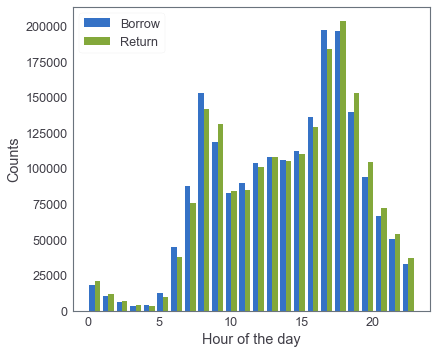

In [187]:
plt.hist([df['start_hour'], df['end_hour']], bins=24, label=['Borrow', 'Return'])
plt.xlabel('Hour of the day')
plt.ylabel('Counts')
plt.grid(False)
plt.legend()
plt.savefig('../plot/dis_hour.pdf', bbox_inches='tight')

In [202]:
start_hour = np.histogram(df['start_hour'].values, range(0,25))
end_hour = np.histogram(df['end_hour'].values, range(0,25))
start_hour[0], np.linspace(0,23,24)

(array([ 18551,  10537,   6202,   3982,   4009,  12772,  44970,  87471,
        153233, 118870,  82904,  89604, 103969, 108032, 106042, 112382,
        135993, 196842, 196499, 139812,  94377,  66802,  50441,  32881]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]))

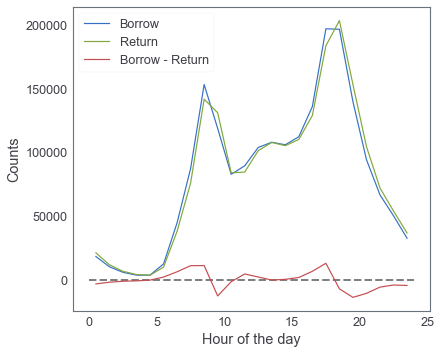

In [216]:
plt.plot([0,24], [0,0], color='gray', linestyle='--', linewidth=2)
plt.plot(np.linspace(0.5,23.5,24), start_hour[0], label='Borrow')
plt.plot(np.linspace(0.5,23.5,24), end_hour[0], label='Return')
plt.plot(np.linspace(0.5,23.5,24), start_hour[0]-end_hour[0], label='Borrow - Return')
plt.grid(False)
plt.xlabel('Hour of the day')
plt.ylabel('Counts')
plt.legend()
plt.savefig('../plot/diff_hour.pdf', bbox_inches='tight')